In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# plt.style.use('ggplot')
# pbd.set_option('max_columns', 100)

In [2]:
df = pd.read_csv('../input/rollercoaster-database/coaster_db.csv')

# First inspection: df.shape, df.head(), df.columns, df.dtypes, df.describe()

In [3]:
df.shape

(1087, 56)

In [4]:
df.head(10)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [5]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [6]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [7]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# Dropping unwanted columns:

In [8]:
df = df[['coaster_name', 
#      'Length', 'Speed', 
     'Location', 'Status', 
#      'Opening date',
#        'Type', 
     'Manufacturer', 
#      'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date', 'Opened', 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 
#      'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
#      'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
#      'height_value', 'height_unit', 
     'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [9]:
df.shape

(1087, 10)

# Converting type of columns

In [10]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [11]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [12]:
df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

# Renaming columns:

In [13]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean'],
      dtype='object')

In [14]:
df = df.rename(columns={'coaster_name':'Coaster_Name', 'year_introduced':'Year_Introduced',
       'opening_date_clean':'Opening_Date', 'speed_mph':'Speed_mph', 'height_ft':'Height_ft', 'Inversions_clean':'Inversion',
       'Gforce_clean':'Gforce'})

In [15]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaT,34.0,NaN,0,NaN


# Finding missing values:

In [16]:
df.isna()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,True,False,False
2,False,False,False,True,False,True,True,True,False,True
3,False,False,False,False,False,False,True,True,False,True
4,False,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
1082,False,False,True,False,False,True,False,True,False,False
1083,False,False,False,False,False,False,False,True,False,True
1084,False,False,True,False,False,False,False,True,False,False
1085,False,False,False,False,False,True,False,True,False,True


In [17]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversion            0
Gforce             725
dtype: int64

# Finding & dropping duplicated rows or features:

In [18]:
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce


In [19]:
# Finding duplicated Coaster_Name:
df.loc[df.duplicated(subset=['Coaster_Name'])]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaT,53.0,NaN,3,4.7


In [20]:
df.query('Coaster_Name == "Derby Racer"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1911,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,1911-01-01,NaN,NaN,0,NaN


In [21]:
# Dropping duplicated rows:
df = df.loc[~df.duplicated(subset=['Coaster_Name'])].reset_index(drop=True).copy()

In [22]:
df.shape

(990, 10)

In [23]:
df.head(20)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Removed,George Francis Meyer,1902,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1904,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Removed,Arthur Jarvis,1907,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1907,NaT,NaN,NaN,0,NaN


In [24]:
df.describe()

,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
count,990.000000,807,850.000000,159.000000,990.000000,324.000000
mean,1994.054545,1994-09-02 10:13:49.739776896,49.017647,103.994340,1.308081,3.815093
min,1884.000000,1884-06-16 00:00:00,5.000000,13.100000,0.000000,0.800000
25%,1988.000000,1987-09-21 00:00:00,37.300000,52.150000,0.000000,3.375000
50%,2000.000000,2000-04-29 00:00:00,50.000000,91.900000,0.000000,4.000000
75%,2009.000000,2010-11-04 00:00:00,58.000000,133.850000,2.000000,4.500000
max,2022.000000,2022-03-01 00:00:00,149.100000,377.300000,14.000000,12.000000
std,23.872027,NaN,16.847266,68.293609,2.026876,1.009229


# Plotting Bars:

In [25]:
df['Year_Introduced'].value_counts().head(10)

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2011    24
2007    24
2013    23
Name: count, dtype: int64

Text(0, 0.5, 'Count')

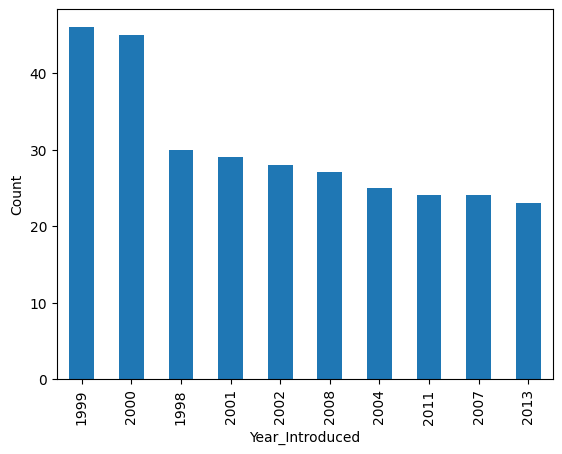

In [26]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar')
ax.set_ylabel('Count')

In [27]:
df['Year_Introduced']>2000

0      False
1      False
2      False
3      False
4      False
       ...  
985     True
986     True
987     True
988     True
989     True
Name: Year_Introduced, Length: 990, dtype: bool

In [28]:
df.query('Year_Introduced>2000').describe()

,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
count,456.000000,388,414.000000,100.000000,456.000000,160.000000
mean,2010.280702,2010-01-14 21:35:15.463917568,52.229469,115.476000,1.598684,3.799313
min,2001.000000,1934-01-01 00:00:00,16.000000,13.100000,0.000000,0.800000
25%,2005.000000,2005-02-27 18:00:00,40.000000,61.825000,0.000000,3.290000
50%,2010.000000,2010-06-30 00:00:00,51.450000,104.850000,0.000000,4.000000
75%,2015.000000,2015-10-01 06:00:00,62.100000,145.200000,3.000000,4.500000
max,2022.000000,2022-03-01 00:00:00,149.100000,367.500000,14.000000,5.600000
std,6.074278,NaN,17.425355,68.197659,2.163412,0.896844


<Axes: xlabel='Year_Introduced'>

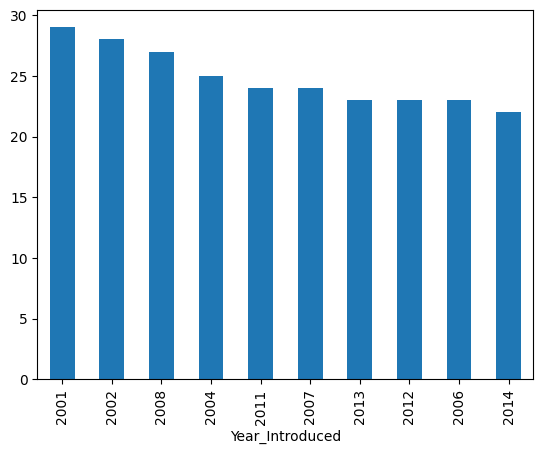

In [29]:
df.query('Year_Introduced>2000')['Year_Introduced'].value_counts().head(10).plot(kind='bar')

# Plotting Histogram:

Text(0.5, 0, 'Speed (mph)')

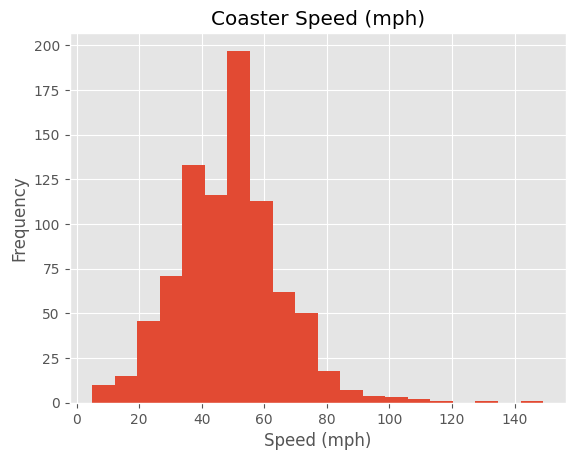

In [30]:
plt.style.use('ggplot')
ax = df['Speed_mph'].plot(kind='hist', bins=20, title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

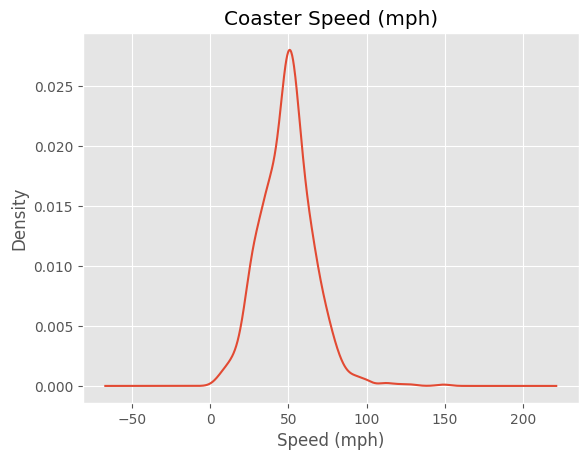

In [31]:
ax = df['Speed_mph'].plot(kind='kde', title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

# Plotting Scatter:

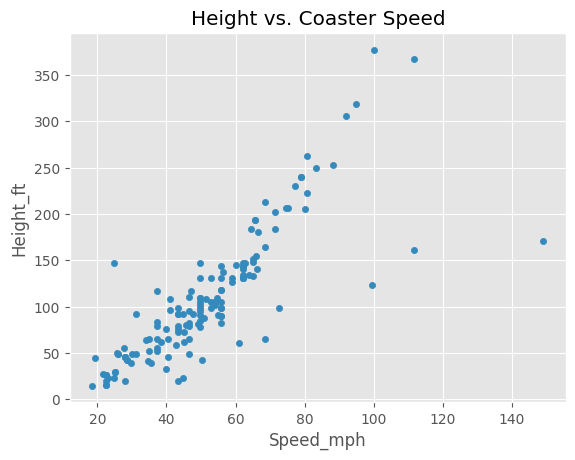

In [32]:
df.plot(kind='scatter', x='Speed_mph', y='Height_ft', title='Height vs. Coaster Speed')
plt.show()

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

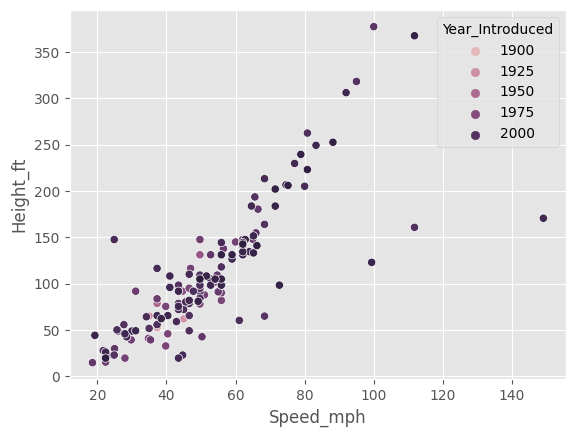

In [33]:
sns.scatterplot(x='Speed_mph', y='Height_ft', data=df, hue='Year_Introduced')

# Plotting pair:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


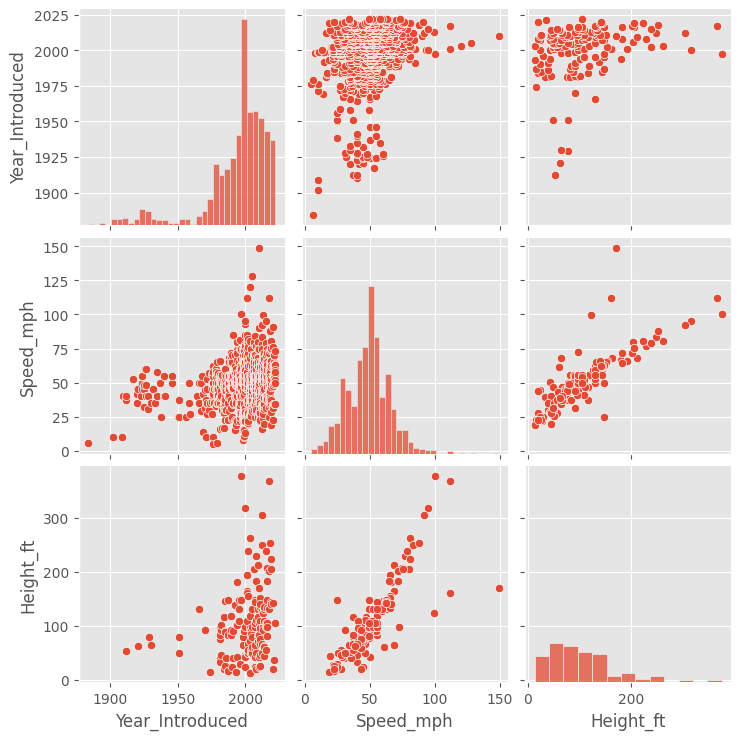

In [34]:
sns.pairplot(df, vars=['Year_Introduced', 'Speed_mph', 'Height_ft'])
plt.show()

# Correlation and Heatmap:

In [35]:
df_corr = df[['Year_Introduced', 'Speed_mph', 'Height_ft', 'Inversion', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversion,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversion,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

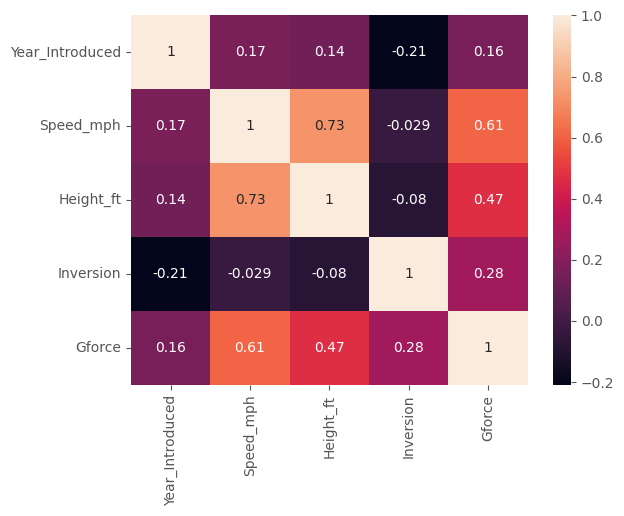

In [36]:
sns.heatmap(df_corr, annot=True)

# What are the locations with the fastest rollercoasters (min of 10)?

In [37]:
df.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,1901-01-01,NaN,NaN,1,NaN


In [38]:
df_dropna = df.dropna()
df_dropna

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,Opening_Date,Speed_mph,Height_ft,Inversion,Gforce
179,Python (Efteling),Efteling,Operating,Vekoma,1981,1981-04-12,46.6,95.1,4,3.5
221,Mindbender (Galaxyland),Galaxyland,closed for maintenance as of july 30 no reopen...,Anton Schwarzkopf,1985,1985-12-20,60.0,145.0,3,5.2
240,Lisebergbanan,Liseberg,Operating,Zierer,1987,1987-04-18,49.7,147.6,0,3.0
262,Eurosat - CanCan Coaster,Europa-Park,Operating,Mack Rides,1989,1989-01-01,37.3,83.7,0,4.0
265,Goudurix,Parc Astérix,Operating,Vekoma,1989,1989-01-01,55.9,118.1,7,3.9
...,...,...,...,...,...,...,...,...,...,...
901,Wildfire (Kolmården Wildlife Park),Kolmården Wildlife Park,Operating,Rocky Mountain Construction,2016,2016-06-28,71.5,183.7,3,4.0
903,DC Rivals HyperCoaster,Warner Bros. Movie World,Operating,Mack Rides,2017,2017-09-22,71.5,202.1,0,4.3
923,Hyperion (roller coaster),Energylandia,Operating,Intamin,2018,2018-07-14,88.2,252.6,1,4.8
955,Zadra (roller coaster),Energylandia,Operating,Rocky Mountain Construction,2019,2019-08-22,75.2,206.0,3,4.0


<Axes: xlabel='Coaster_Name', ylabel='Speed_mph'>

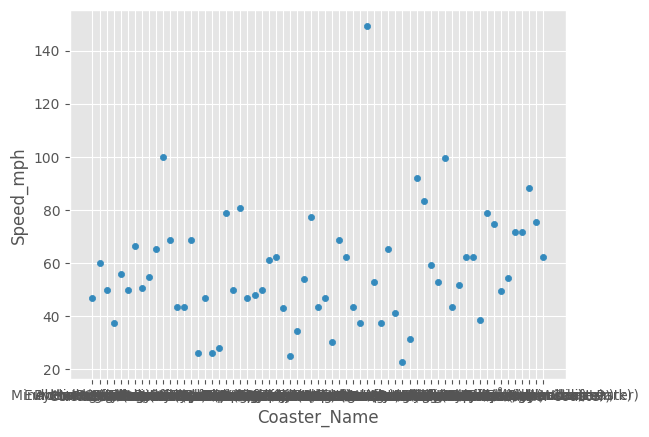

In [39]:
df_dropna.plot(kind='scatter', x='Coaster_Name', y='Speed_mph')

In [40]:
df.query('Location!="Other"').groupby('Location')['Speed_mph'].agg(['mean', 'count']).query('count>=10').sort_values('mean', ascending=False)

,mean,count
Location,,
Busch Gardens Williamsburg,58.318182,11
Cedar Point,57.833333,18
Six Flags Magic Mountain,57.241176,17
Canada's Wonderland,53.533333,12
Six Flags Great Adventure,53.036364,11
Kings Dominion,52.083333,12
Hersheypark,50.576923,13
Kings Island,49.273684,19
Carowinds,43.571429,14


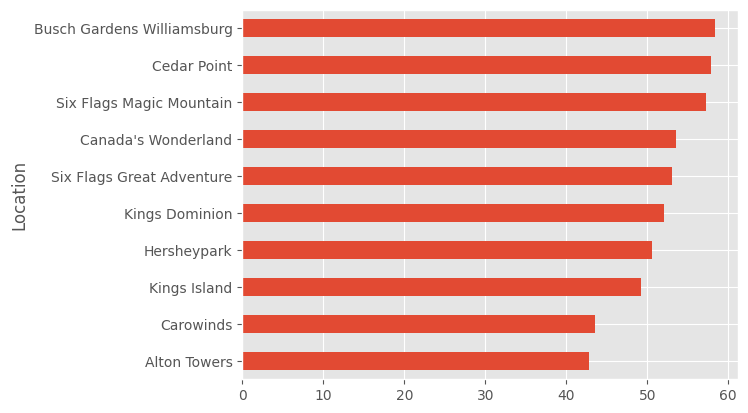

In [41]:
df.query('Location!="Other"').groupby('Location')['Speed_mph'].agg(['mean', 'count']).query('count>=10').sort_values('mean')['mean'].plot(kind='barh')
plt.show()